In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
path = r'C:\Users\Ben\Desktop\Career Foundry Tasks\Board Game Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, 'newboardgamedata.csv'), index_col = False)

In [4]:
complexity = df.groupby(df['YearPublished'])['Complexity'].mean()

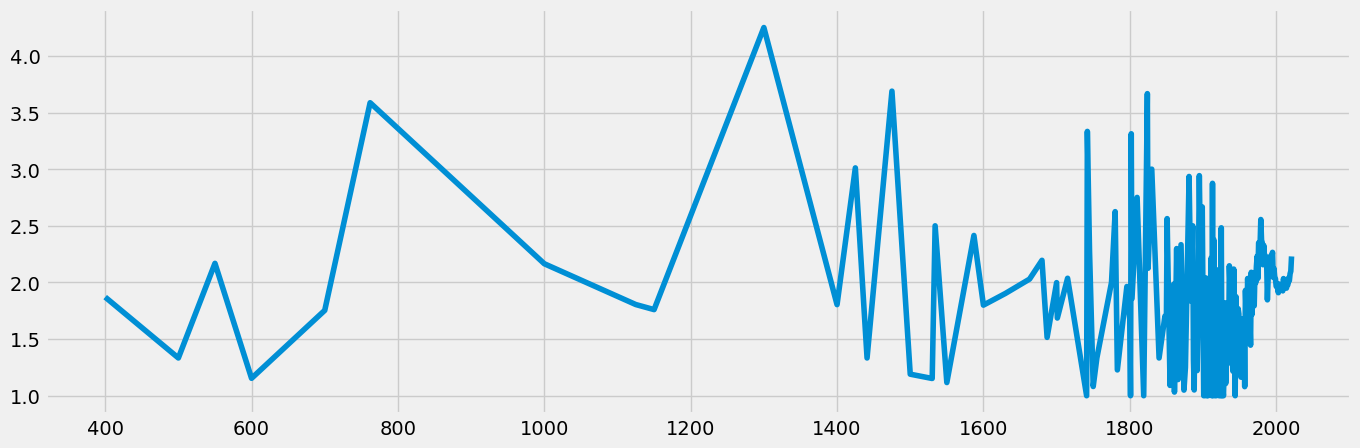

In [5]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(complexity)

Making a subset of games that were published after 1900. There are few games prior to 1900 with few ratings so the data isn't as accurate as more recent data.

In [6]:
complexity_sub = df.loc[(df['YearPublished'] >=1900)]

In [7]:
comp_sub = complexity_sub.groupby(complexity_sub['YearPublished'])['Complexity'].mean()

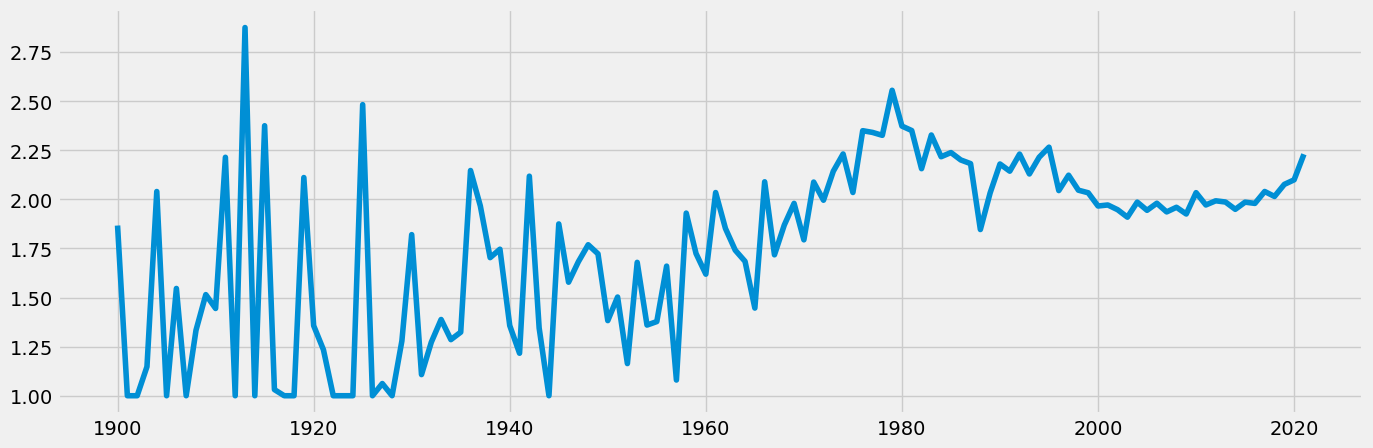

In [8]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(comp_sub)

There still aren't as many games in the early 1900s so there is a large spread in complexity rating. As more and more games are published and introduced, the spread is a lot less year over year. Games appeared to get more complex up to 1980 and declined in complexity until around 2000 when it remained flat and has been increasing over the past few years.

In [12]:
comp_sub.shape

(122,)

In [13]:
comp_sub.head()

YearPublished
1900    1.866667
1901    1.000000
1902    1.000000
1903    1.148050
1904    2.040000
Name: Complexity, dtype: float64

In [14]:
comp_sub.isnull().sum()

0

In [18]:
comp_sub.head()

YearPublished
1900    1.866667
1901    1.000000
1902    1.000000
1903    1.148050
1904    2.040000
Name: Complexity, dtype: float64

In [34]:
comp_1 = pd.DataFrame({'date': comp_sub.index, 'complexity': comp_sub.values})

In [35]:
comp_1

,date,complexity
0,1900,1.866667
1,1901,1.000000
2,1902,1.000000
3,1903,1.148050
4,1904,2.040000
...,...,...
117,2017,2.040113
118,2018,2.014814
119,2019,2.076263
120,2020,2.099447


In [36]:
from datetime import datetime

comp_1['datetime'] = pd.to_datetime(comp_1['date'], format= '%Y')
comp_1 = comp_1.set_index('datetime')
comp_1.drop(['date'], axis=1, inplace=True)
comp_1.head()

,complexity
datetime,
1900-01-01,1.866667
1901-01-01,1.000000
1902-01-01,1.000000
1903-01-01,1.148050
1904-01-01,2.040000


In [31]:
decomposition = sm.tsa.seasonal_decompose(result, model='additive')

In [32]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

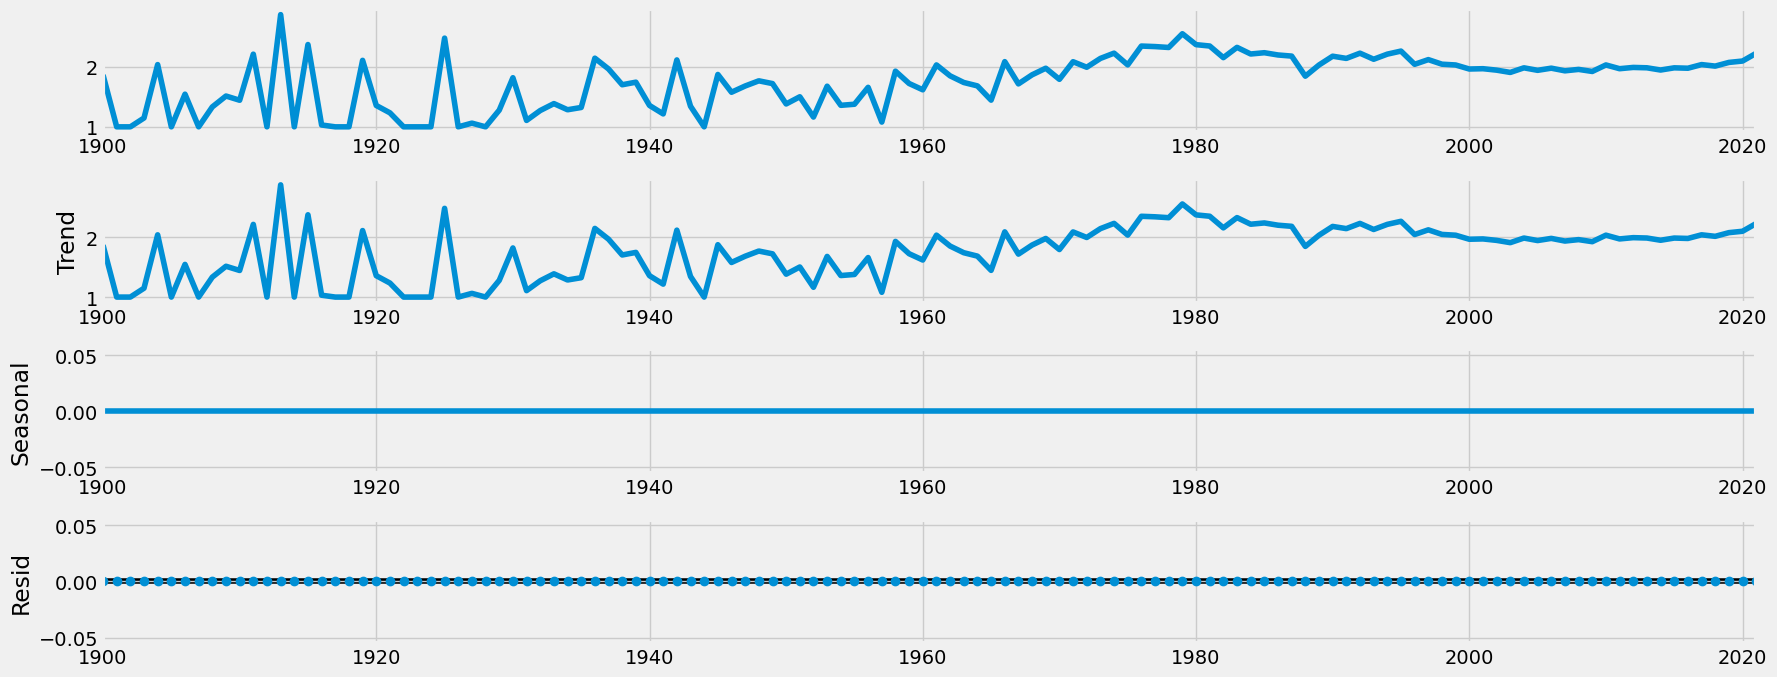

In [33]:
decomposition.plot()
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(comp_1['complexity'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.450176
p-value                          0.557999
Number of Lags Used              5.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


We are checking if the data is stationary. The p-value is greater than 0.05 so we can not reject the null hypothesis that the data has a unit root, so the data is non-stationary.

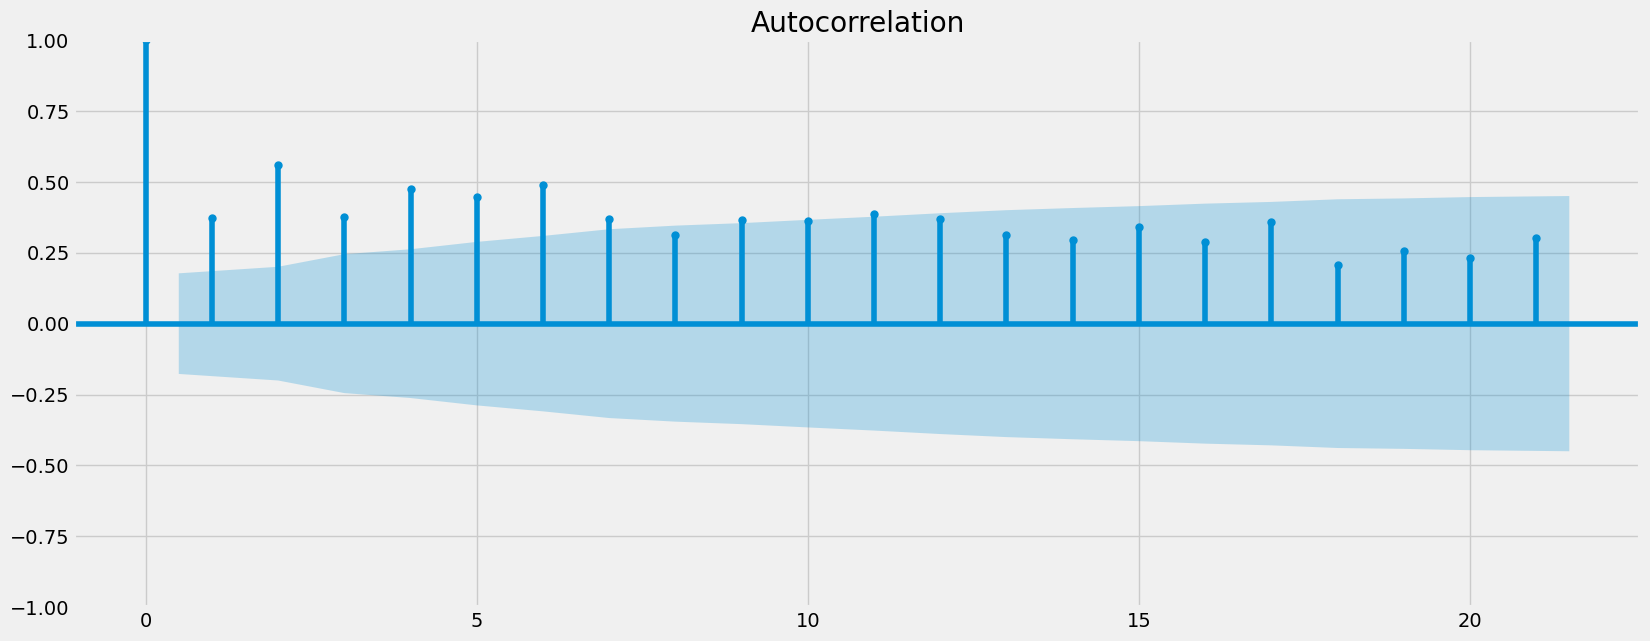

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(comp_1)
plt.show()

In [39]:
data_diff = comp_1 - comp_1.shift(1)

In [40]:
data_diff.dropna(inplace = True)

In [41]:
data_diff.head()

,complexity
datetime,
1901-01-01,-0.866667
1902-01-01,0.000000
1903-01-01,0.148050
1904-01-01,0.891950
1905-01-01,-1.040000


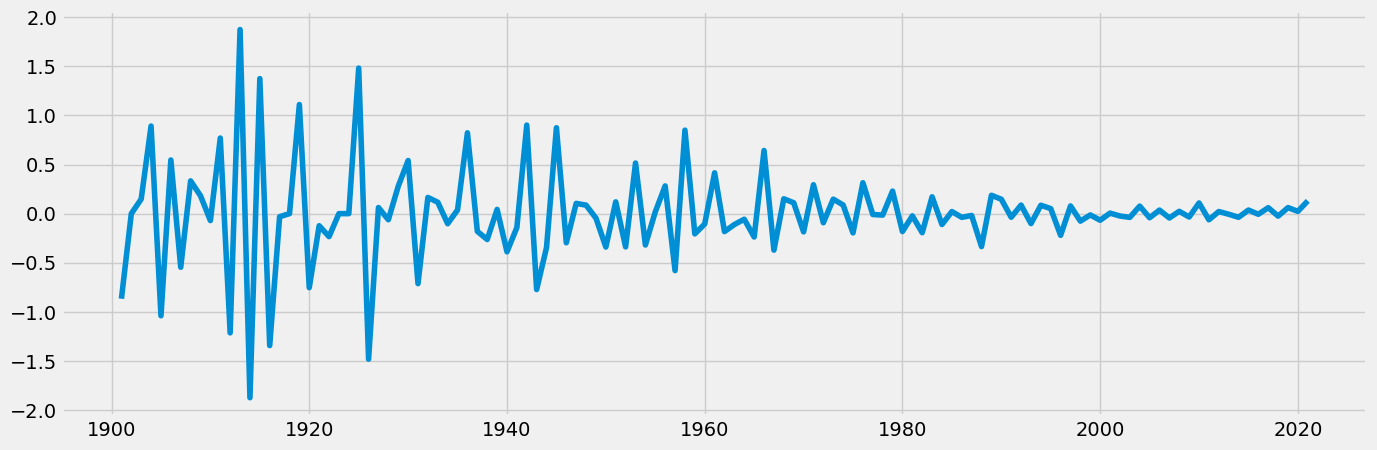

In [42]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.047756e+00
p-value                        4.933702e-15
Number of Lags Used            4.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64


The p-value is much lower than 0.05 so we can reject the null hypothesis that there is a unit root so the data is stationary.

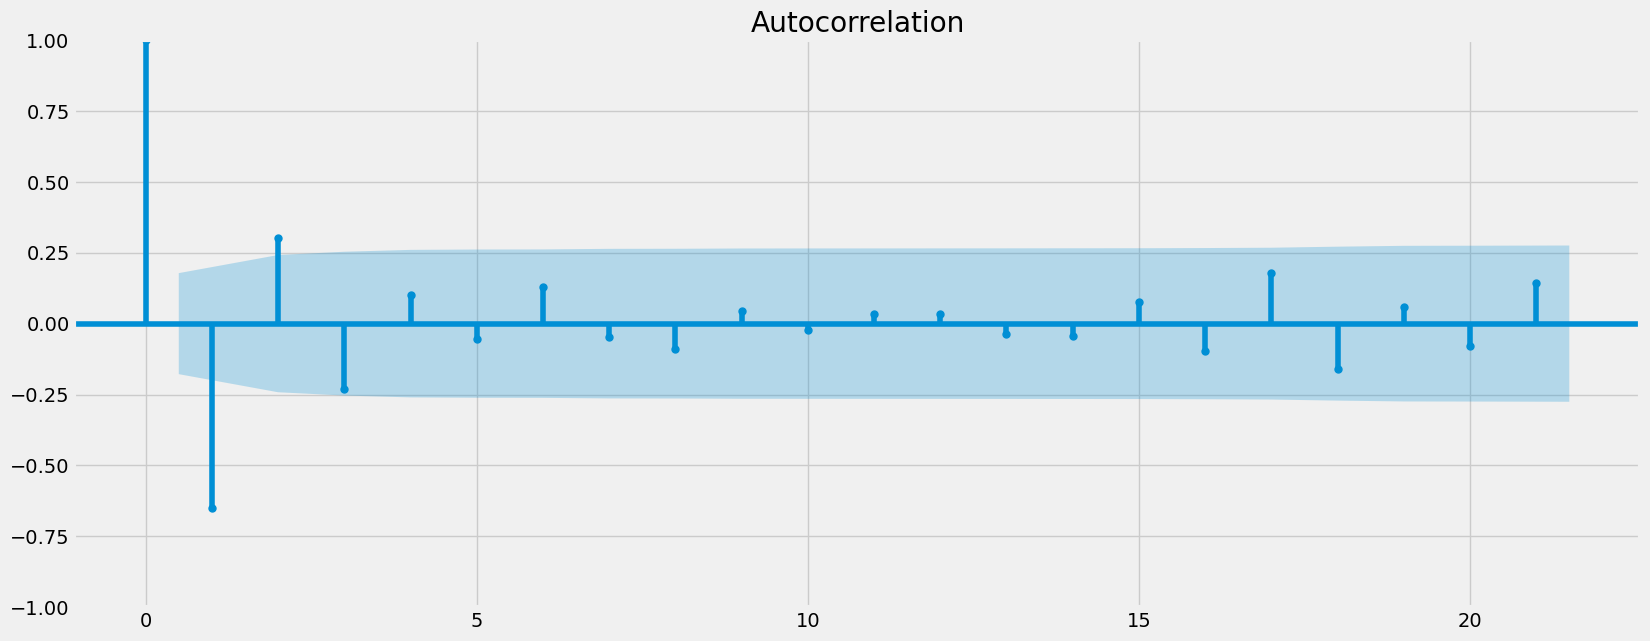

In [46]:
plot_acf(data_diff)
plt.show()